<a href="https://colab.research.google.com/github/srujayreddyv/AlphaML/blob/main/labs/1ClassificationOnCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classification on Cifar 10

In [73]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

##Dataset Exploration

In [74]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [75]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [76]:
print(train_labels[0:20])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]


In [77]:
print(tf.reduce_min(train_images[0]), tf.reduce_max(train_images[0]))

tf.Tensor(0, shape=(), dtype=uint8) tf.Tensor(255, shape=(), dtype=uint8)


In [78]:
print(test_images.shape, test_labels.shape)

(10000, 32, 32, 3) (10000, 1)


AttributeError: ignored

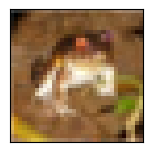

In [94]:
class_names = ['aeroplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

##Preprocessing

In [80]:
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0
print(tf.reduce_min(train_images[0]), tf.reduce_max(train_images[0]))

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [81]:
print('Before:', train_labels[0])
train_labels = tf.one_hot(train_labels[..., 0], depth=10)
print('After:', train_labels[0])
print(train_labels.shape)

Before: [6]
After: tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)
(50000, 10)


In [82]:
test_labels = tf.one_hot(test_labels[..., 0], depth=10)
print(test_labels.shape)

(10000, 10)


##Model Building

In [83]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape = [32, 32, 3],
    alpha = 1.0,
    weights = None,
    classes = 10,
    classifier_activation = 'softmax'
)

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 16, 16, 32)           864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 16, 16, 32)           0         ['bn_Conv1[0

##Model Training

In [84]:
epochs = 20

In [85]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=64, verbose=True, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 68s 37ms/step - loss: 1.8805 - accuracy: 0.3107 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 2/20
782/782 [==============================] - 28s 36ms/step - loss: 1.5087 - accuracy: 0.4549 - val_loss: 2.3547 - val_accuracy: 0.1000
Epoch 3/20
782/782 [==============================] - 28s 35ms/step - loss: 1.4129 - accuracy: 0.5006 - val_loss: 2.3606 - val_accuracy: 0.1000
Epoch 4/20
782/782 [==============================] - 27s 35ms/step - loss: 1.2681 - accuracy: 0.5539 - val_loss: 2.3588 - val_accuracy: 0.1000
Epoch 5/20
782/782 [==============================] - 28s 36ms/step - loss: 1.2185 - accuracy: 0.5752 - val_loss: 2.2913 - val_accuracy: 0.1072
Epoch 6/20
782/782 [==============================] - 27s 35ms/step - loss: 1.1093 - accuracy: 0.6104 - val_loss: 1.9480 - val_accuracy: 0.2549
Epoch 7/20
782/782 [==============================] - 29s 37ms/step - loss: 1.0202 - accuracy: 0.6469 - val_loss: 1.2678 - val_accuracy:

##Evaluation

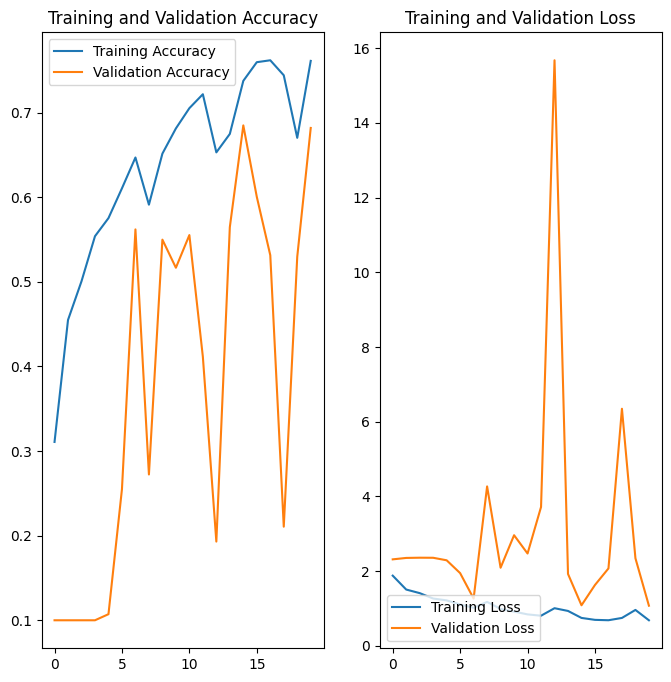

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  print(predicted_label, true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [90]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 6ms/step


In [91]:
predictions[0]

array([9.4016468e-05, 1.6086405e-07, 6.4549496e-04, 9.5376337e-01,
       2.6320686e-04, 3.8932245e-02, 6.2678419e-03, 2.8605229e-05,
       4.2806828e-06, 8.3969422e-07], dtype=float32)

3 3


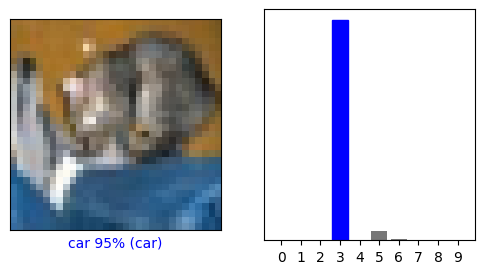

In [95]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

3 3
1 8
8 8
0 0
6 6
5 6
3 1
6 6
3 3
1 1
0 0
9 9
4 5
7 7
9 9


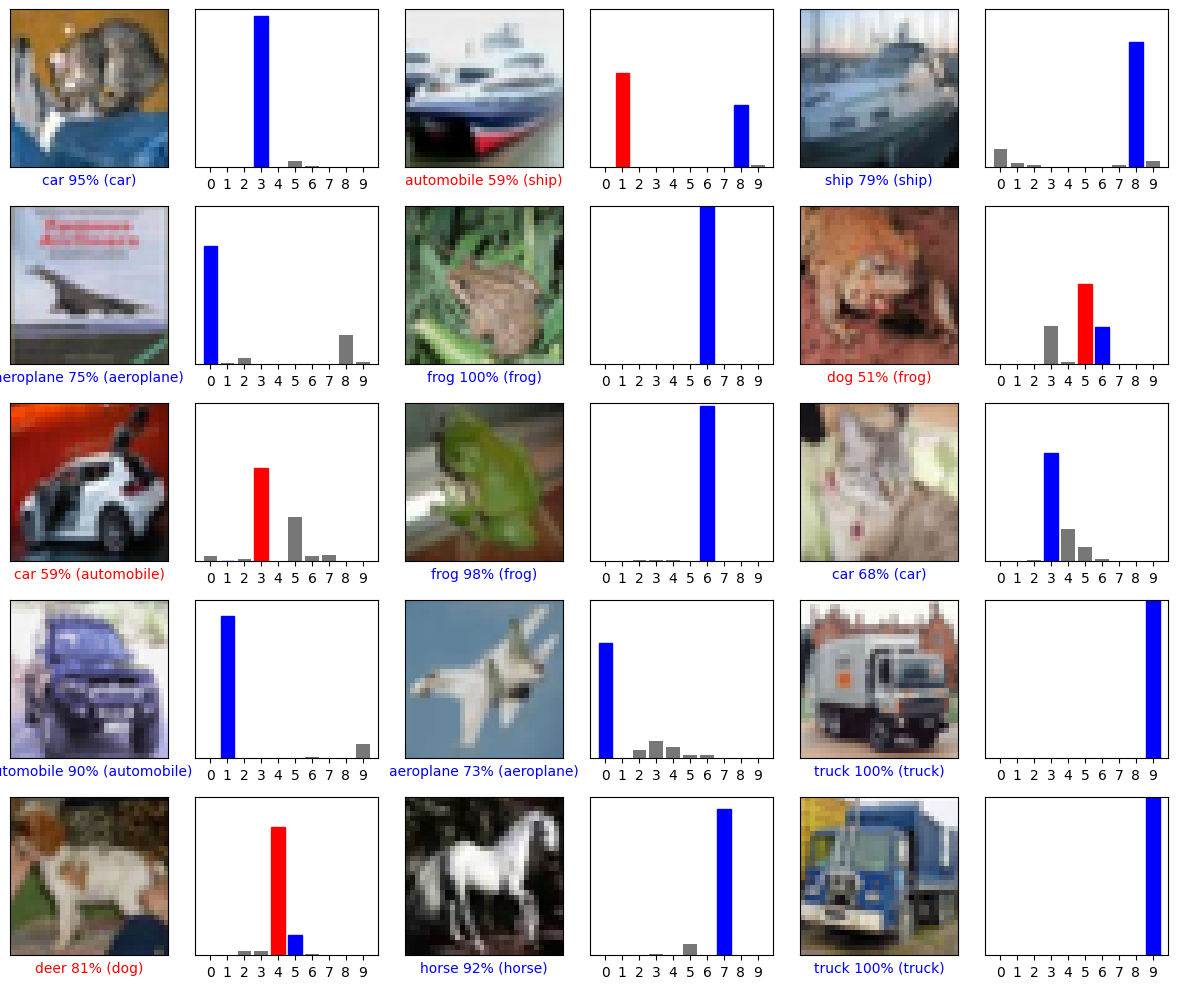

In [96]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(4*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
